In [51]:
import pickle
import numpy as np
import os
import platform
import numpy as np
import matplotlib.pyplot as plt
import download
import data_utils
%matplotlib inline

In [54]:
class KNN(object):
  def _init_(self, k=1):
   pass
  
  def training(self, X, y):
    self.X_train = X
    self.y_train = y
  
  def predict(self, X, k=1, num_loops=0):
    if num_loops==0:
      distances = self.compute_distances(X)
    else:
        raise ValueError('Invalid value %d for num_loops' % num_loops)

    return self.predict_labels(distances, k=k)

  def compute_distances(self, X):
    num_train = self.X_train.shape[0]
    num_test = X.shape[0]
    distances = np.zeros((num_test, num_train))

    #dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
    # (x-y)^2 = x^2 - 2xy + y^2

    x2 = np.sum(np.square(self.X_train), axis=1)
    y2 = np.sum(np.square(X), axis=1)[:, np.newaxis]
    xy =  np.dot(X, self.X_train.T)
    distances = np.sqrt(x2 - 2*xy + y2)
    pass
    return distances

  def predict_labels(self, dists, k=1):
      num_test = dists.shape[0]
      y_pred = np.zeros(num_test)
      for i in range(num_test):
          closest_y = []
          sorted_dist = np.argsort(dists[i])
          closest_y = list(self.y_train[sorted_dist[0:k]])
          pass
          y_pred[i]= (np.argmax(np.bincount(closest_y)))
          pass
      return y_pred






In [16]:
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "./CIFARdata"
download.maybe_download_and_extract(url,download_dir)

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [55]:
cifar10_dir = './CIFARdata/cifar-10-batches-py'
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

# Checking the size of the training and testing data
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


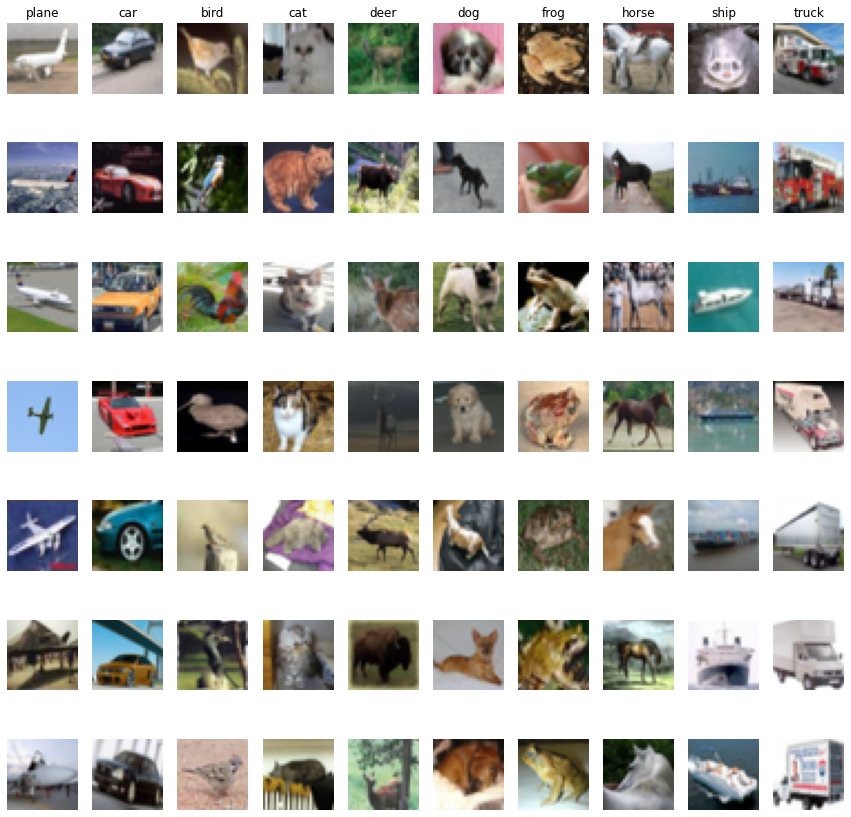

In [58]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize = (15, 15))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [60]:
# Memory error prevention by subsampling data

num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# New section

In [61]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 3072) (1000, 3072)


In [62]:
classifier = KNN()
classifier.training(X_train, y_train)
distances= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(distances, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 297 / 1000 correct => accuracy: 0.297000


In [63]:
num_folds = 5
k_values = [1, 5, 8, 10, 12, 20, 50, 65, 80, 100]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}

for k in k_values:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNN()
        classifier.training(X_train, y_train)
        dists = classifier.compute_distances(X_test)
        y_test_pred = classifier.predict_labels(dists, k)

        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num_test
        k_to_accuracies[k].append(accuracy)


print("Printing 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


Printing 5-fold accuracies for varying values of k:

k = 1, accuracy = 0.554000
k = 1, accuracy = 0.560000
k = 1, accuracy = 0.568000
k = 1, accuracy = 0.565000
k = 1, accuracy = 0.549000
k = 5, accuracy = 0.581000
k = 5, accuracy = 0.576000
k = 5, accuracy = 0.587000
k = 5, accuracy = 0.567000
k = 5, accuracy = 0.544000
k = 8, accuracy = 0.578000
k = 8, accuracy = 0.569000
k = 8, accuracy = 0.583000
k = 8, accuracy = 0.541000
k = 8, accuracy = 0.549000
k = 10, accuracy = 0.584000
k = 10, accuracy = 0.587000
k = 10, accuracy = 0.598000
k = 10, accuracy = 0.547000
k = 10, accuracy = 0.548000
k = 12, accuracy = 0.591000
k = 12, accuracy = 0.566000
k = 12, accuracy = 0.586000
k = 12, accuracy = 0.536000
k = 12, accuracy = 0.532000
k = 20, accuracy = 0.554000
k = 20, accuracy = 0.554000
k = 20, accuracy = 0.575000
k = 20, accuracy = 0.537000
k = 20, accuracy = 0.547000
k = 50, accuracy = 0.542000
k = 50, accuracy = 0.519000
k = 50, accuracy = 0.542000
k = 50, accuracy = 0.524000
k = 50, ac

k = 1, average accuracy = 0.559200
k = 5, average accuracy = 0.571000
k = 8, average accuracy = 0.564000
k = 10, average accuracy = 0.572800
k = 12, average accuracy = 0.562200
k = 20, average accuracy = 0.553400
k = 50, average accuracy = 0.528400
k = 65, average accuracy = 0.518800
k = 80, average accuracy = 0.514200
k = 100, average accuracy = 0.505600


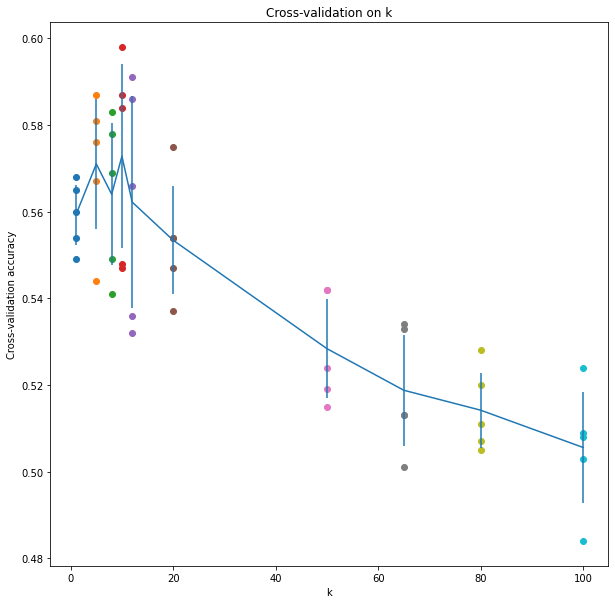

In [83]:
for k in k_values:
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)
  

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.rcParams['figure.figsize'] = [10,12]
plt.errorbar(k_values, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()